In [2]:
#Name-Vipul Anand
#Task-Glass Identification
#Batch-DS2312

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv')

In [7]:
data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [18]:
columns=data.columns
columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [16]:
#since the column names in this dataframe are not available 
#So first we need to add the column names here than we can proceed

In [21]:
new_columns={'1':'ID','1.52101':'RI','13.64':'NA','4.49':'MG','1.10':'AI','71.78':'SI','0.06':'k',
            '8.75':'Ca','0.00':'Ba','0.00.1':'Fe','1.1':'Types Of Glass'}

In [24]:
data.rename(columns=new_columns,inplace=True)

In [26]:
#SO out Data colunms are renamed as of now
data

,ID,RI,NA,MG,AI,SI,k,Ca,Ba,Fe,Types Of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [27]:
#SO now let us move to the preprocessing steps

In [28]:
#First let us drop the ID column are all the id has different data
data.drop(columns='ID',inplace=True)
data

,RI,NA,MG,AI,SI,k,Ca,Ba,Fe,Types Of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [29]:
#Now let us check the nulls
data.isna().sum()

RI                0
NA                0
MG                0
AI                0
SI                0
k                 0
Ca                0
Ba                0
Fe                0
Types Of Glass    0
dtype: int64

In [30]:
#There are no nulls in this data
#Now let us check the value counts of all the columns
for i in data.columns:
    print(data[i].value_counts())

RI
1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 177, dtype: int64
NA
13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64
MG
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: count, Length: 93, dtype: int64
AI
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: count, Length: 117, dtype: int64
SI
72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: count, Length: 132, dtype: int64
k
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: count, Length: 65, dtype: int64
Ca
8.03    5
8

In [31]:
data

,RI,NA,MG,AI,SI,k,Ca,Ba,Fe,Types Of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [37]:
#Now the first thing we have to do is to divide the types of glass into 2 categories as we were instructed
data['Types Of Glass']=data['Types Of Glass'].replace({1:'window',2:'window',3:'window',5:'non window',6:'non window',7:'non window'})

In [41]:
#now let us check the dtypes of the data columns
data.dtypes

RI                float64
NA                float64
MG                float64
AI                float64
SI                float64
k                 float64
Ca                float64
Ba                float64
Fe                float64
Types Of Glass     object
dtype: object

In [42]:
#so all the value are float
#now let us encode the types of glass columns
from sklearn.preprocessing import LabelEncoder

In [43]:
lab_enc=LabelEncoder()

In [46]:
data['Types Of Glass']=lab_enc.fit_transform(data['Types Of Glass'])
data['Types Of Glass']

0      1
1      1
2      1
3      1
4      1
      ..
208    0
209    0
210    0
211    0
212    0
Name: Types Of Glass, Length: 213, dtype: int64

In [47]:
data['Types Of Glass'].value_counts()

Types Of Glass
1    162
0     51
Name: count, dtype: int64

In [49]:
#Now let us proceed to the outliers detection procedures

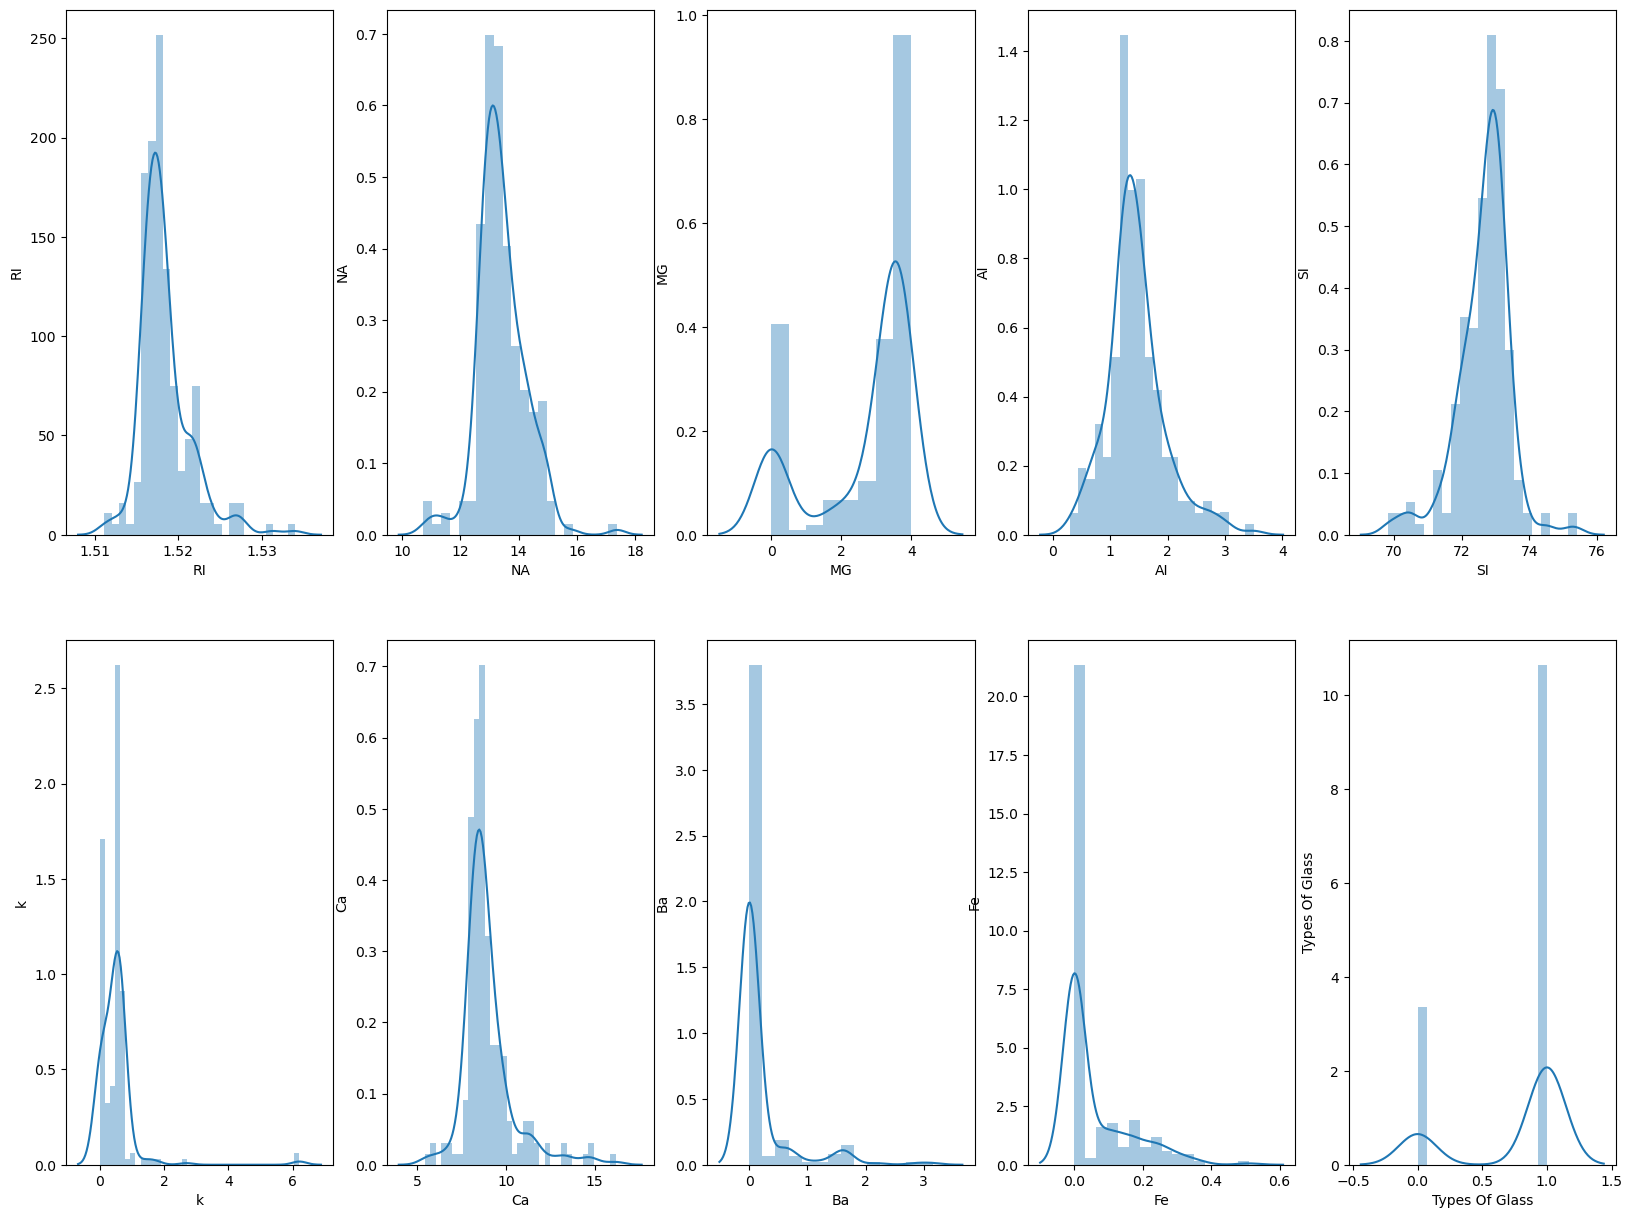

In [51]:
#Let us visualize the data properly than we can conclude the outliers
plt.figure(figsize=(20,15))
plotnumber=1
for columns in data:
    plt.subplot(2,5,plotnumber)
    sns.distplot(data[columns])
    plt.ylabel(columns)
    plotnumber=plotnumber+1
plt.show()

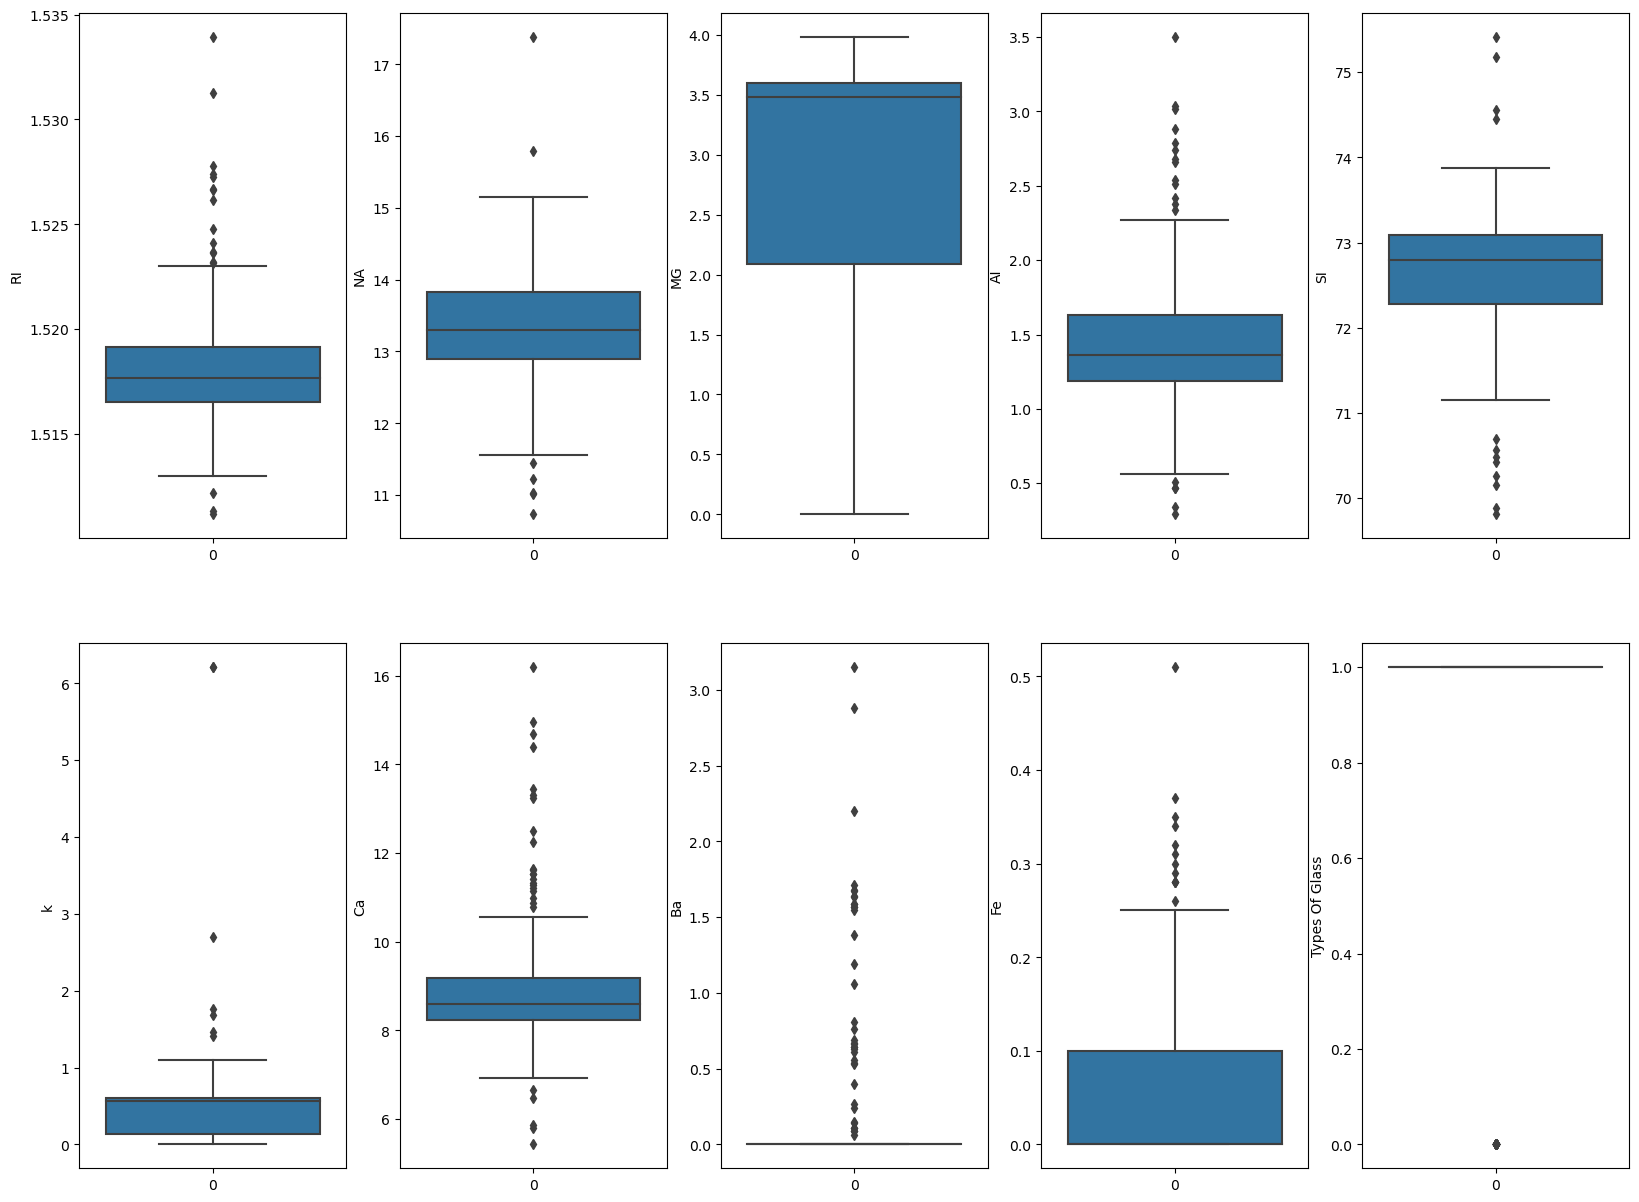

In [52]:
#from the graph we can see that there are some outliers present in the data
#so let us plot a boxplot to this 
plt.figure(figsize=(20,15))
plotnumber=1
for columns in data:
    plt.subplot(2,5,plotnumber)
    sns.boxplot(data[columns])
    plt.ylabel(columns)
    plotnumber=plotnumber+1
plt.show()

In [53]:
#so from the graph it is very clear that the dataset has outliers alongside

In [54]:
#so now we will take the help of z score to remove these outliers

In [55]:
from scipy.stats import zscore

In [56]:
Zscore=np.abs(zscore(data))

In [57]:
Zscore

,RI,NA,MG,AI,SI,k,Ca,Ba,Fe,Types Of Glass
0,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301,0.561084
1,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301,0.561084
2,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301,0.561084
3,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301,0.561084
4,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200,0.561084
...,...,...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301,1.782266
209,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301,1.782266
210,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301,1.782266
211,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301,1.782266


In [72]:
index=np.where(Zscore>3)

In [75]:
index=index[0]

In [78]:
data.drop(index=index,axis=0,inplace=True)

In [79]:
data

,RI,NA,MG,AI,SI,k,Ca,Ba,Fe,Types Of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,0
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,0
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,0


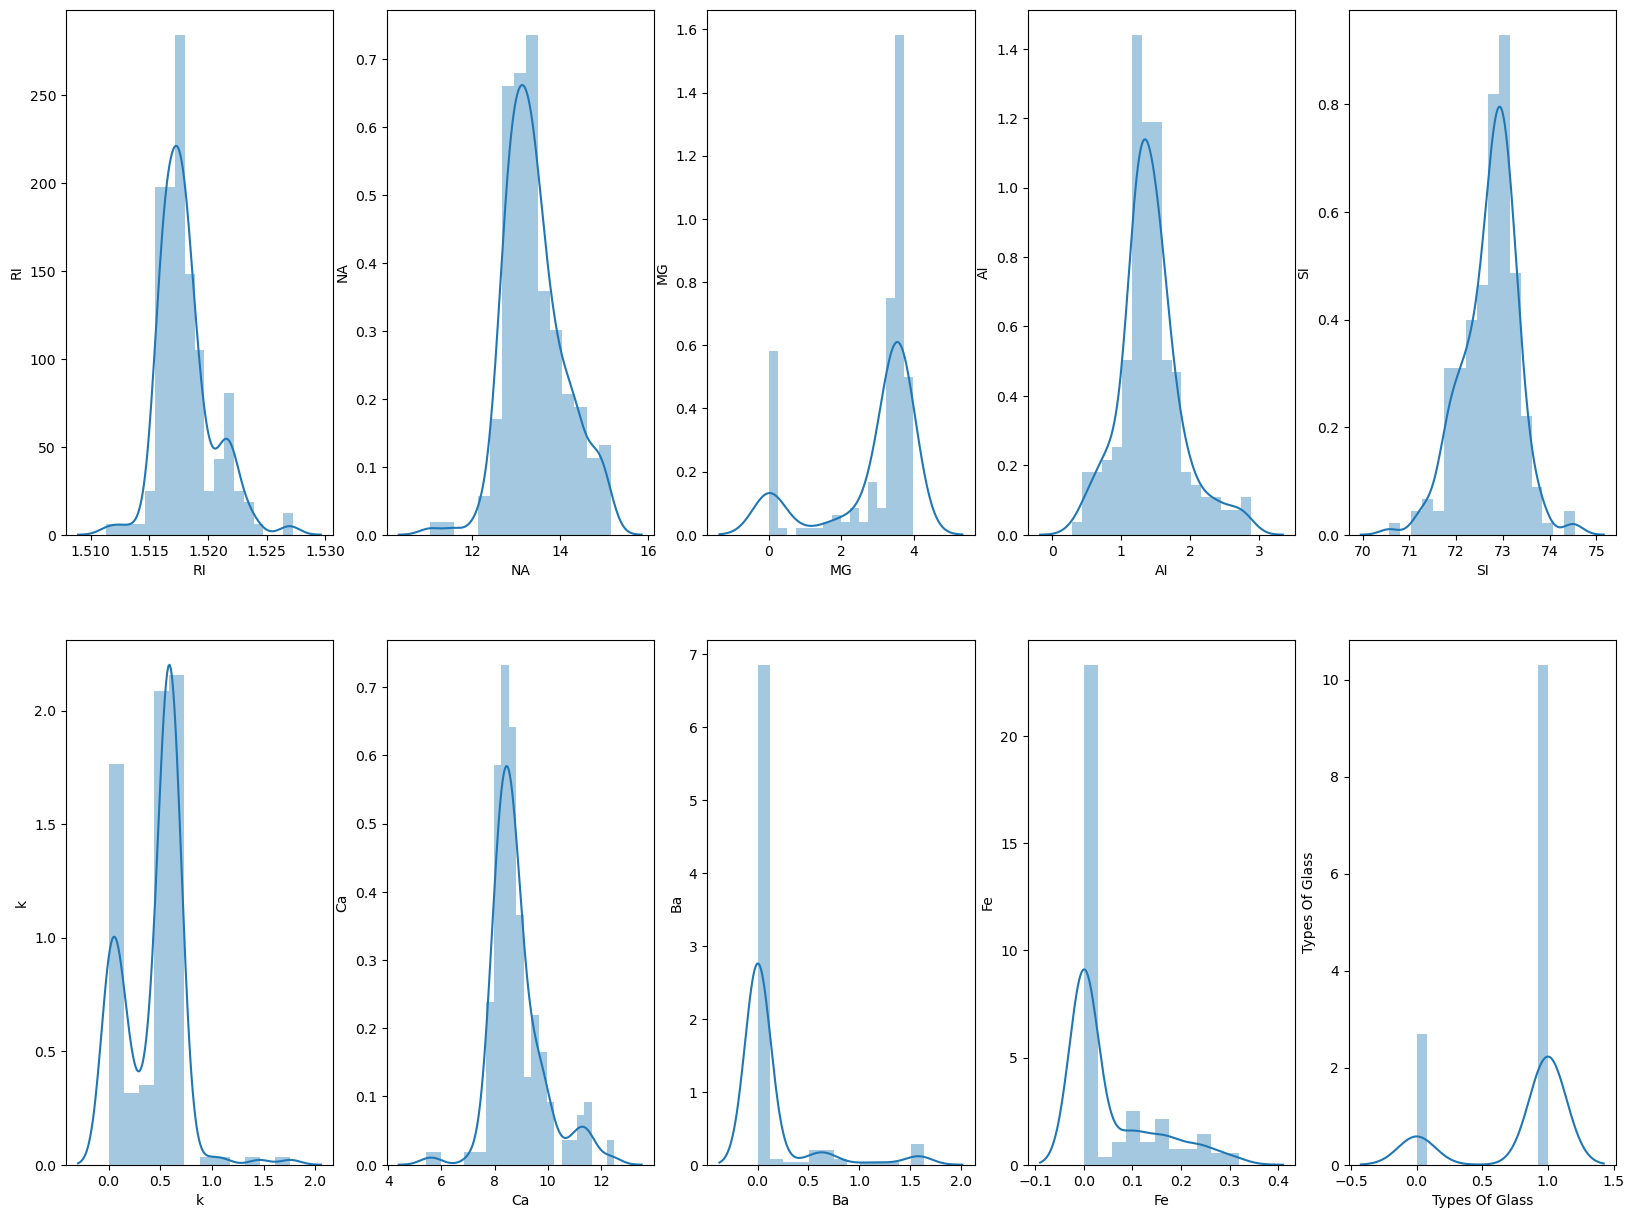

In [85]:
#Now our data is clean 
#let us plot the boxplot once again to see the distribution
plt.figure(figsize=(20,15))
plotnumber=1
for columns in data:
    plt.subplot(2,5,plotnumber)
    sns.distplot(data[columns])
    plt.ylabel(columns)
    plotnumber=plotnumber+1
plt.show()

In [81]:
#SO now we can clearly see the difference after zscore transformation

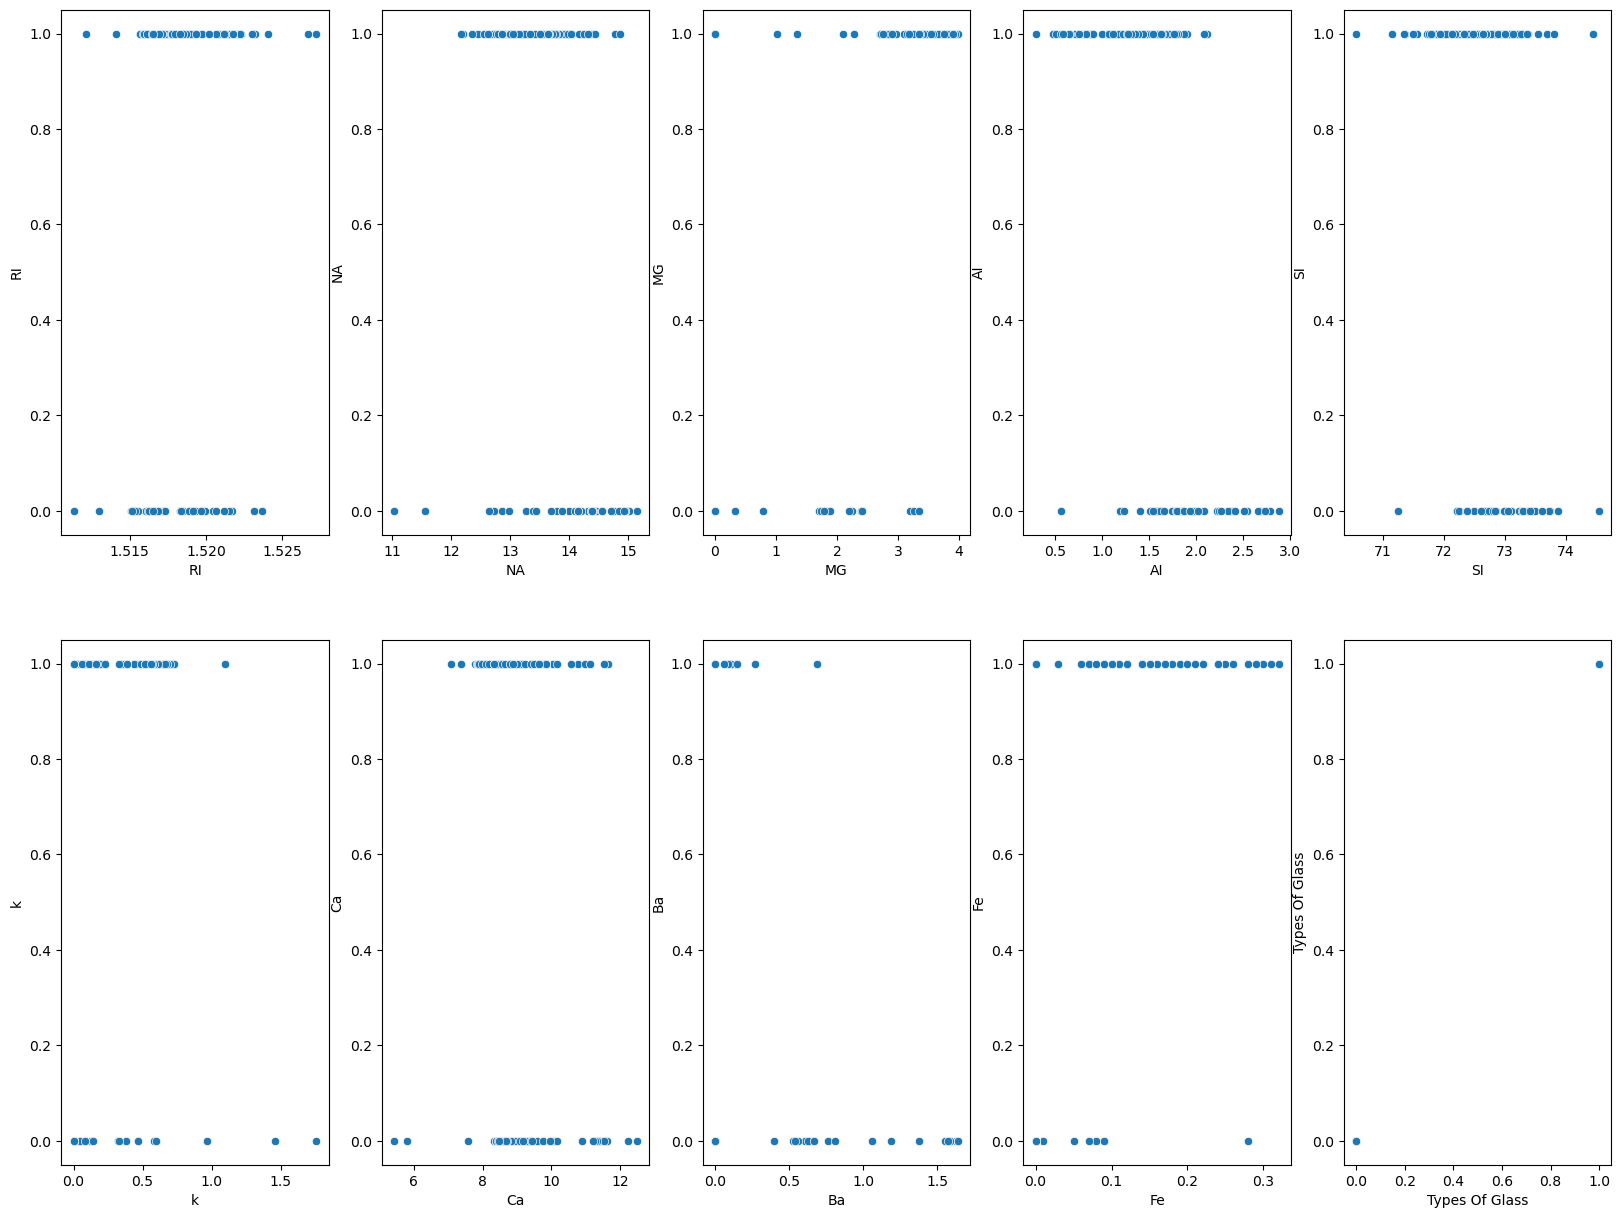

In [86]:
#Now let us plot a scatter plot to see the relation of the columns with the label
plt.figure(figsize=(20,15))
plotnumber=1
for columns in data:
    plt.subplot(2,5,plotnumber)
    sns.scatterplot(x=columns,y='Types Of Glass',data=data)
    plt.ylabel(columns)
    plotnumber=plotnumber+1
plt.show()

In [87]:
#Now let us see the coorelation matrix of the data
corr=data.corr()

In [88]:
corr

,RI,NA,MG,AI,SI,k,Ca,Ba,Fe,Types Of Glass
RI,1.000000,0.048762,0.040224,-0.520285,-0.604910,-0.362609,0.694174,-0.191584,-0.016095,0.057285
NA,0.048762,1.000000,-0.491934,0.254805,-0.233588,-0.612858,0.020123,0.532913,-0.209057,-0.465046
MG,0.040224,-0.491934,1.000000,-0.591948,-0.371123,0.495241,-0.456909,-0.586867,0.138597,0.841035
AI,-0.520285,0.254805,-0.591948,1.000000,0.331868,0.000847,-0.213887,0.531651,-0.120321,-0.600057
SI,-0.604910,-0.233588,-0.371123,0.331868,1.000000,0.062254,-0.167478,0.153207,0.018382,-0.280572
k,-0.362609,-0.612858,0.495241,0.000847,0.062254,1.000000,-0.503380,-0.257401,0.095794,0.402067
Ca,0.694174,0.020123,-0.456909,-0.213887,-0.167478,-0.503380,1.000000,-0.168033,-0.011883,-0.288043
Ba,-0.191584,0.532913,-0.586867,0.531651,0.153207,-0.257401,-0.168033,1.000000,-0.121189,-0.618002
Fe,-0.016095,-0.209057,0.138597,-0.120321,0.018382,0.095794,-0.011883,-0.121189,1.000000,0.209504
Types Of Glass,0.057285,-0.465046,0.841035,-0.600057,-0.280572,0.402067,-0.288043,-0.618002,0.209504,1.000000


<Axes: >

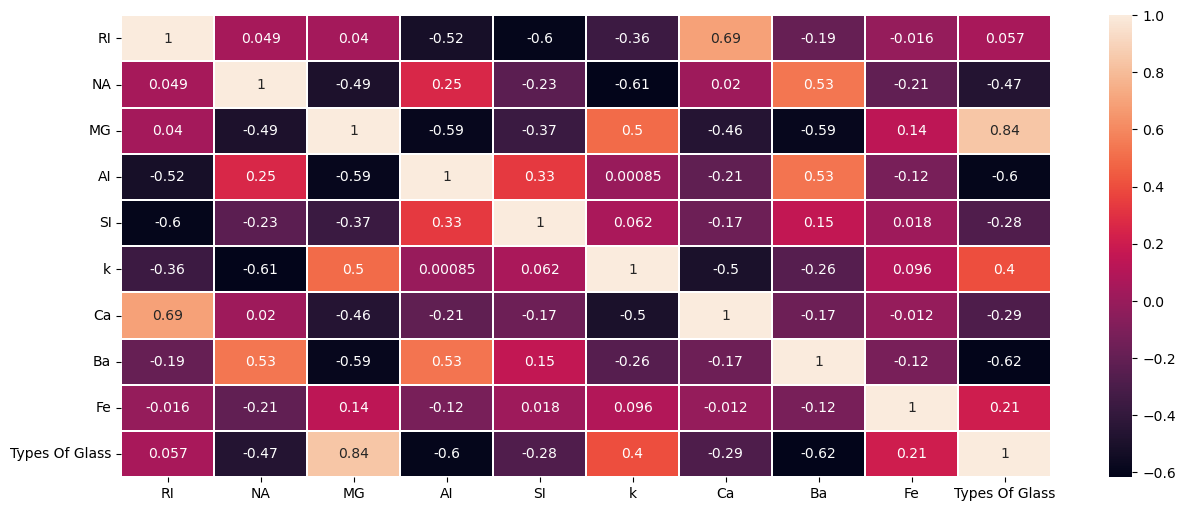

In [90]:
#The heatmap to see the coorelation
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,linewidths=0.1)

In [93]:
corr['Types Of Glass'].sort_values(ascending=False)

Types Of Glass    1.000000
MG                0.841035
k                 0.402067
Fe                0.209504
RI                0.057285
SI               -0.280572
Ca               -0.288043
NA               -0.465046
AI               -0.600057
Ba               -0.618002
Name: Types Of Glass, dtype: float64

In [95]:
#SO we can see that all the value are related with the label
#Now we need to divide the data in features and labels
x=data.drop(columns='Types Of Glass')
y=data['Types Of Glass']

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [98]:
x_scaled

,RI,NA,MG,AI,SI,k,Ca,Ba,Fe
0,-0.191475,0.704498,0.558738,-0.145324,0.007760,0.165576,-1.005952,-0.347296,-0.605187
1,-0.819092,0.169658,0.520382,0.260836,0.455342,-0.154697,-1.056501,-0.347296,-0.605187
2,-0.169531,-0.305754,0.627781,-0.303276,-0.198816,0.485849,-0.611669,-0.347296,-0.605187
3,-0.274865,-0.216615,0.574081,-0.416098,0.610275,0.414677,-0.763316,-0.347296,-0.605187
4,-0.915648,-0.929734,0.566410,0.441351,0.420913,0.734950,-0.763316,-0.347296,2.428607
...,...,...,...,...,...,...,...,...,...
188,-0.722535,1.417617,-2.202957,2.968571,0.214336,-1.542547,0.631836,1.165248,-0.605187
189,-0.797147,1.075914,-2.202957,3.284473,-0.198816,-1.257860,0.358872,2.621773,-0.605187
190,-0.525034,2.234732,-2.202957,1.276236,0.575845,-1.542547,-0.429693,4.106307,-0.605187
191,1.142758,1.402760,-2.202957,1.343930,1.195574,-1.542547,-0.389254,4.246358,-0.605187


In [99]:
#Now we need to check the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
vif=pd.DataFrame()

In [102]:
vif['vif']=[variance_inflation_factor(x_scaled.values,i) for i in range(9)]
vif['columns']=x.columns

In [103]:
vif

,vif,columns
0,5.596001,RI
1,44.596611,NA
2,171.715520,MG
3,21.031910,AI
4,34.107826,SI
5,11.321033,k
6,105.200719,Ca
7,14.112074,Ba
8,1.106578,Fe


In [108]:
#Here the MG and Ca have very high multicollinearity so we will remove both of them
x_scaled.drop(columns=['MG','Ca'],inplace=True)

In [109]:
Vif=pd.DataFrame()
Vif['vif']=[variance_inflation_factor(x_scaled.values,i) for i in range(7)]
Vif['columns']=x.columns

In [110]:
Vif

,vif,columns
0,3.003863,RI
1,3.261987,NA
2,1.893221,AI
3,2.461974,SI
4,2.687886,k
5,1.943693,Ba
6,1.064614,Fe


In [111]:
#After dropping both the mg and ca we can see the difference in the vif score
#so out decesion was right
# NOw let us proceed to the model building part

In [112]:
y.value_counts()

Types Of Glass
1    153
0     40
Name: count, dtype: int64

In [113]:
#The dataset is clearly imbalanced so we will first balance this
from imblearn.over_sampling import SMOTE

In [115]:
sm=SMOTE(sampling_strategy=0.8) # we have set the ratio to 0.8

In [120]:
x_resampled,y_resampled=sm.fit_resample(x_scaled,y)

In [121]:
y_resampled.value_counts()

Types Of Glass
1    153
0    122
Name: count, dtype: int64

In [123]:
#so our dataset is balanced now

In [124]:
#now let us import the libraries to make our model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  

In [126]:
# we will use the decesion tree to get to the best random state
maxAcc=0
maxrs=0
for i in range(1,200):
    ds=DecisionTreeClassifier()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    ds.fit(x_train,y_train)
    pred=ds.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxrs=i
print(maxAcc,maxrs)

1.0 6


In [127]:
#so the best accuracy is 1.0 and the best random state is 6
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=6)

In [128]:
#now let us run the model on different algorithms and see which has best accuracy
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [129]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc]

In [130]:
accuracy={}
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    accuracy[i]=accuracy_score(y_test,pred)
accuracy

{RandomForestClassifier(): 1.0,
 ExtraTreesClassifier(): 1.0,
 LogisticRegression(): 1.0,
 SVC(): 0.9795918367346939,
 DecisionTreeClassifier(): 0.9795918367346939,
 GradientBoostingClassifier(): 0.9795918367346939,
 AdaBoostClassifier(): 0.9795918367346939,
 BaggingClassifier(): 1.0}

In [132]:
#So all the models here are having high accuracy
#So we will proceed with the model with the highest accuracy after the cross validation score
cross_val_accu={}
for i in models:
    cross_val_accu[i]=cross_val_score(i, x_train,y_train,cv=5).mean()
cross_val_accu

{RandomForestClassifier(): 0.9376847290640393,
 ExtraTreesClassifier(): 0.9307881773399014,
 LogisticRegression(): 0.9236453201970443,
 SVC(): 0.9376847290640393,
 DecisionTreeClassifier(): 0.8546798029556651,
 GradientBoostingClassifier(): 0.9169950738916256,
 AdaBoostClassifier(): 0.9448275862068967,
 BaggingClassifier(): 0.8963054187192118}

In [135]:
#so the adaboostclassifier has the best accuracy aftet the cross validation score so we will proceed with that
Abc=AdaBoostClassifier()
Abc.fit(x_train,y_train)
pred=Abc.predict(x_test)
accuracy_score(y_test,pred)

0.9795918367346939

In [136]:
#now let us do the hyperparameter tuning

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
#parameters for Adaboostclassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [42] 
}

In [139]:
grid_search = GridSearchCV(estimator=Abc, param_grid=param_grid, cv=5, scoring='accuracy')

In [140]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200], 'random_state': [42]},
             scoring='accuracy')

In [141]:
print(grid_search.best_estimator_,grid_search.best_params_,grid_search.best_score_)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42) {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42} 0.9517241379310345


In [142]:
grid_search.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 42}

In [155]:
#so now let us apply these parameters to the adaboostclassifier
Abc=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.0,n_estimators=100,random_state=42)

In [156]:
Abc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42)

In [158]:
pred=Abc.predict(x_test)
print(accuracy_score(y_test,pred))
y_pred=Abc.predict(x_train)
print(accuracy_score(y_train,y_pred))

1.0
1.0


In [150]:
#So we have concluded our model building phase

In [152]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('The roc_auc_score of the model ',i,' is ',roc_auc_score(y_test,pred))

The roc_auc_score of the model  RandomForestClassifier()  is  1.0
The roc_auc_score of the model  ExtraTreesClassifier()  is  1.0
The roc_auc_score of the model  LogisticRegression()  is  1.0
The roc_auc_score of the model  SVC()  is  0.9888888888888889
The roc_auc_score of the model  DecisionTreeClassifier()  is  0.9888888888888889
The roc_auc_score of the model  GradientBoostingClassifier()  is  0.875
The roc_auc_score of the model  AdaBoostClassifier()  is  0.875
The roc_auc_score of the model  BaggingClassifier()  is  0.9777777777777779


In [153]:
#So we have finished making up the model

In [ ]:
'''Conclusions-
The randomforestclassifier, extratreeclassifier and the logisticregression had the best accuracy and roc_auc_score without the
cross validation but after the cross validation the adaboostclassifier beated all the rest of the models by a significant margin.
And after the hyperparameter tuning the Adaboostclassifier had an accuracy of 1.0 with the test data and 1.0 with the training
dataset as well which is great'''

In [161]:
#Thank-You